### K-means 군집화 분석 (Elbow method, Silhouette Score 활용)

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [6]:
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16 
from keras.models import Model
from sklearn.cluster import KMeans\
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from random import randint
import pandas as pd
import shutil
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
df=pd.read_csv('imagepathforclustering.csv')
imagePath=df["imagePath"].tolist()

In [10]:
path=r'C:\JupyterProject\융복합\908'
os.chdir(path)
trees = []

In [12]:
# 파일 이름들만 뽑아내기
with os.scandir(path) as files:
    for file in files:
        if file.name.endswith('.png'):
            trees.append(file.name)

In [20]:
# 이미지 loading (224x224 array)
img = load_img(trees[0], target_size=(224,224))
# 'PIL.Image.Image' 에서 numpy array로 변환
img = np.array(img)
print(img.shape)   # (224, 224, 3)

(224, 224, 3)


(224, 224, 3)

In [21]:
# 이미지 reshape
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)  # (1, 224, 224, 3)

(1, 224, 224, 3)


(1, 224, 224, 3)

In [22]:
x = preprocess_input(reshaped_img)

In [23]:
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [24]:
def extract_features(file, model):
    img = load_img(file, target_size=(224,224))
    img = np.array(img) 
    reshaped_img = img.reshape(1,224,224,3) 
    imgx = preprocess_input(reshaped_img)
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [25]:
data = {}
for tree in trees:
    feat = extract_features(tree,model)
    data[tree] = feat

In [26]:
filenames = np.array(list(data.keys()))
feat = np.array(list(data.values()))
feat = feat.reshape(-1,4096)

C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

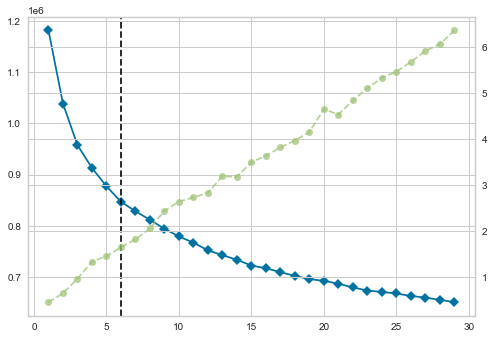

In [28]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,30))
visualizer.fit(feat)

In [29]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [68]:
for i in [5,6,7,8,9,10]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    score=silhouette_score(x, kmeans.labels_, metric='euclidean')
    print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.085
Silhouetter Score: 0.085
Silhouetter Score: 0.085
Silhouetter Score: 0.085
Silhouetter Score: 0.085
Silhouetter Score: 0.085


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A93429FD0>,
                     colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=10,
                                      random_state=42))

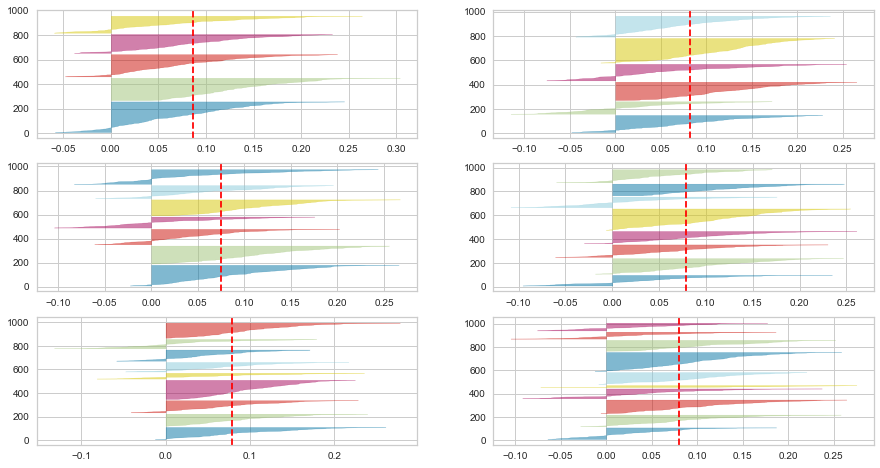

In [67]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(3, 2, figsize=(15,8))
km = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=100, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[0][0])
visualizer.fit(x)
km = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=100, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[0][1])
visualizer.fit(x)
km = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=100, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[1][0])
visualizer.fit(x)
km = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=100, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[1][1])
visualizer.fit(x)
km = KMeans(n_clusters=9, init='k-means++', n_init=10, max_iter=100, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[2][0])
visualizer.fit(x)
km = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=100, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[2][1])
visualizer.fit(x)

In [ ]:
kmeans = KMeans(n_clusters=5,n_jobs=-1, random_state=22)
kmeans.fit(x)

In [70]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [71]:
for j in range(5):
    os.mkdir('C:\JupyterProject\융복합\908/'+'group'+'_'+str(j))

In [72]:
for j in range(5):
    for i in groups[j]:
        shutil.move("C:\JupyterProject\융복합\908/"+i, "C:\JupyterProject\융복합\908/"+"group_"+str(j)+"/"+i)